In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [5]:
# Read in data
df_2020 = pd.read_csv('../data/img_scout_dfs/2020/INC_coreg_skysat_scout_2020.csv')
df_2021 = pd.read_csv('../data/img_scout_dfs/2021/INC_skysat_scout_2021.csv')
df_2022 = pd.read_csv('../data/img_scout_dfs/2022/INC_skysat_scout_2022.csv')

# Leave out 2022 for now
dfs = [df_2020,df_2021, df_2022]

In [6]:
# add vis
def add_vis(df):
    df['ndvi']= (df['nir']-df['red'])/(df['nir']+df['red'])
    df['evi']= 2.5*(df['nir']-df['red'])/(df['nir']+6*df['red']-7.5*df['blue']+1)
    df['savi']= 1.5*(df['nir']-df['red'])/(df['nir']+df['red']+0.5)
    df['arvi']=(df['nir']-(2*df['red']-df['blue']))/(df['nir']+(2*df['red']-df['blue']))
    df['grvi']=(df['green']-df['red'])/(df['green']+df['red'])
    df['bgvi'] = df['blue']-df['green']/df['blue']+df['green']

    df['gcc']=df['green']/(df['green']+df['red']+df['blue'])
    df['gri']=df['green']/df['red']
    #df['sr']= df['nir']/df['red']
    #df['msr']= ((df['nir']/df['red'])-1)/(np.sqrt((df['nir']/df['red'])+1))
    #df['dvi']= df['nir']-df['red']
    #df['nirv']= df['ndvi']*df['nir']
    #df['tvi']=0.5*(120*(df['nir']-df['green'])-200*(df['red']-df['green']))
    return df

In [7]:
for df in dfs:
    add_vis(df)
    
    df['inc_class'] = 'low'
    df.loc[df['DM_inc']>25,'inc_class']= 'high'
    
    df['severity_class'] = 'low'
    df.loc[df['DM_severity']>10,'severity_class']= 'high'
    
    df.loc[df['ndvi']<=0.65,'ndvi_group']= '<0.66'
    df.loc[(df['ndvi']> 0.65)&(df['ndvi']<=0.7),'ndvi_group']='0.66-0.70'
    df.loc[(df['ndvi']> 0.7)&(df['ndvi']<=0.75),'ndvi_group']='0.71-0.75'
    df.loc[(df['ndvi']> 0.75)&(df['ndvi']<=0.8),'ndvi_group']='0.76-0.80'
    df.loc[(df['ndvi']> 0.8)&(df['ndvi']<=0.85),'ndvi_group']='0.81-0.85'
    df.loc[(df['ndvi']> 0.85),'ndvi_group']='>0.85'

In [8]:
master_df = pd.concat(dfs)

In [9]:
master_df.columns

Index(['acquired', 'plot', 'blue', 'green', 'red', 'nir', 'row', 'panel',
       'Date', 'Treatment', 'Block', 'PM_severity', 'DM_severity', 'total_dis',
       'geometry', 'centroid', 'PM_inc', 'DM_inc', 'ndvi', 'evi', 'savi',
       'arvi', 'grvi', 'bgvi', 'gcc', 'gri', 'inc_class', 'severity_class',
       'ndvi_group'],
      dtype='object')

In [10]:
master_df

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,...,evi,savi,arvi,grvi,bgvi,gcc,gri,inc_class,severity_class,ndvi_group
0,20200618,1,0.040044,0.077491,0.071216,0.353575,1,1,2020-06-18,5.0,...,0.476784,0.457984,0.550895,0.042197,-1.817615,0.410546,1.088113,low,low,0.66-0.70
1,20200618,2,0.044693,0.081807,0.077133,0.336587,1,2,2020-06-18,9.0,...,0.442999,0.425929,0.508816,0.029403,-1.703900,0.401735,1.060588,low,low,<0.66
2,20200618,4,0.040121,0.076396,0.070693,0.343482,1,4,2020-06-18,18.0,...,0.464962,0.447599,0.544620,0.038776,-1.787612,0.408077,1.080681,low,low,0.66-0.70
3,20200618,5,0.034862,0.073497,0.060772,0.358279,1,5,2020-06-18,6.0,...,0.508925,0.485566,0.610381,0.094766,-1.999851,0.434554,1.209374,low,low,0.71-0.75
4,20200618,6,0.039300,0.075070,0.068893,0.337817,1,6,2020-06-18,2.0,...,0.461615,0.444889,0.548540,0.042904,-1.795808,0.409629,1.089656,low,low,0.66-0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,20220720,311,0.032145,0.059807,0.057203,0.363662,20,7,2022-07-20,8.0,...,0.522683,0.499191,0.631049,0.022250,-1.768593,0.400971,1.045512,low,low,0.71-0.75
716,20220720,313,0.035590,0.064490,0.063863,0.355103,20,9,2022-07-20,28.0,...,0.494849,0.475382,0.587977,0.004882,-1.711946,0.393368,1.009813,low,low,0.66-0.70
717,20220720,315,0.031925,0.059046,0.055421,0.367525,20,11,2022-07-20,14.0,...,0.534199,0.507240,0.646459,0.031668,-1.758564,0.403342,1.065408,low,low,0.71-0.75
718,20220720,317,0.032294,0.060229,0.058652,0.364500,20,13,2022-07-20,30.0,...,0.518666,0.496963,0.621767,0.013269,-1.772526,0.398408,1.026895,low,low,0.71-0.75


Low disease: 1866
High disease: 548
Proportion: 3.41 : 1


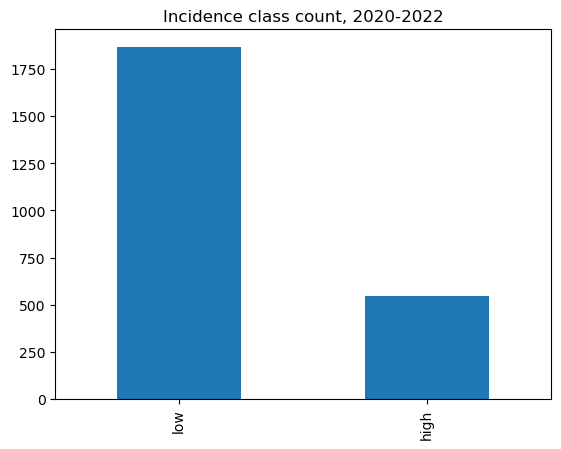

In [11]:
# Visualize data imbalance

target_count = master_df.inc_class.value_counts()
print('Low disease:', target_count[0])
print('High disease:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Incidence class count, 2020-2022');

Low disease: 791
High disease: 404
Proportion: 1.96 : 1


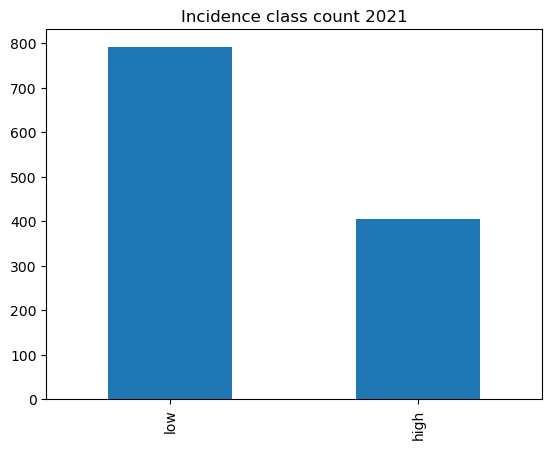

In [12]:
# For each year
target_count = dfs[1].inc_class.value_counts()
print('Low disease:', target_count[0])
print('High disease:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
    
target_count.plot(kind='bar', title='Incidence class count 2021');

In [12]:
# Plot high vs low counts per day all years

# colors = ["#0F8518", "#FFFFFF"]
# sns.set_palette(colors)
# sns.boxplot(data=dfs[0], x='Date', y='arvi', hue='disease_class',showfliers=False)
# plt.ylabel('ARVI')
# plt.legend(title='Disease Severity')

In [13]:
print('High disease EVI:', master_df[master_df['inc_class']=='high'].evi.mean())
print('Low disease EVI:', master_df[master_df['inc_class']=='low'].evi.mean())

High disease EVI: 0.45086111605627904
Low disease EVI: 0.4694224223978387


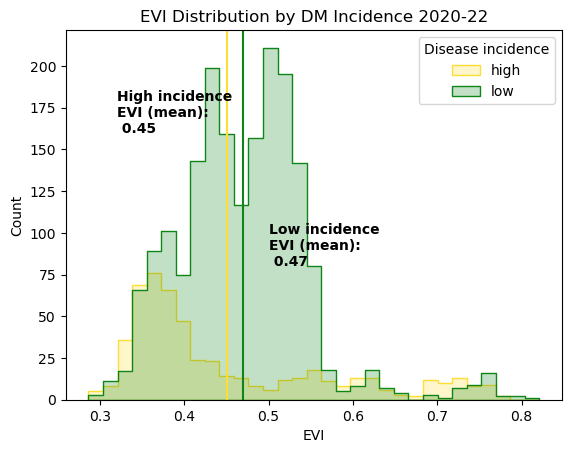

In [15]:
# Plot distributions for 2020-2021
colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=master_df, x="evi", hue="inc_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease incidence', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=master_df[master_df['inc_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.32, 160, "High incidence \nEVI (mean):\n 0.45", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=master_df[master_df['inc_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.5, 80, "Low incidence \nEVI (mean):\n 0.47", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Incidence 2020-22')
#plt.savefig("evi_hist_20_21.png")
plt.show()

In [16]:
# Use Mann-whitney U test to check if differences are significant
from scipy import stats
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return print("Mann-Whitney U:", u_statistic, "p-value:", p_value)

In [20]:
# define distributions (EVI, all years)
dist_1 = master_df[master_df['inc_class']=='low']['evi']
dist_2 = master_df[master_df['inc_class']=='high']['evi']

In [21]:
mann_whitney_u_test(dist_1, dist_2)

Mann-Whitney U: 642985.5 p-value: 4.283623893884584e-20


In [22]:
# Try with just 2020

dist_low_20 = dfs[0][dfs[0]['inc_class']=='low']['evi']
len(dist_low_20)
dist_high_20 = dfs[0][dfs[0]['inc_class']=='high']['evi']
len(dist_high_20)

print(mann_whitney_u_test(dist_low_20, dist_high_20))
print("Low disease EVI (mean):", dist_low_20.mean())
print("High disease EVI (mean):", dist_high_20.mean())

Mann-Whitney U: 6544.5 p-value: 2.5206614510950456e-31
None
Low disease EVI (mean): 0.5150578424010114
High disease EVI (mean): 0.6555709932902264


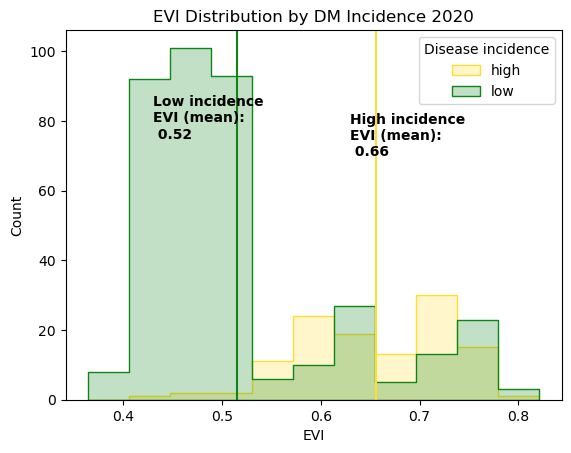

In [23]:
# Plot the 2020 EVI distribution

colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=dfs[0], x="evi", hue="inc_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease incidence', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[0][dfs[0]['inc_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.63, 70, "High incidence \nEVI (mean):\n 0.66", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[0][dfs[0]['inc_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.43, 75, "Low incidence \nEVI (mean):\n 0.52", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Incidence 2020')
#plt.savefig("evi_hist_2020.png")
plt.show()

In [24]:
# Try with just 2021
dist_low_21 = dfs[1][dfs[1]['inc_class']=='low']['evi']
len(dist_low_21)
dist_high_21 = dfs[1][dfs[1]['inc_class']=='high']['evi']
len(dist_high_21)

print(mann_whitney_u_test(dist_low_21, dist_high_21))

print("Low disease EVI (mean) 2021:", dist_low_21.mean())
print("High disease EVI (mean) 2021:", dist_high_21.mean())

Mann-Whitney U: 256929.0 p-value: 2.0973978138453817e-66
None
Low disease EVI (mean) 2021: 0.4687804493201137
High disease EVI (mean) 2021: 0.3890013186333973


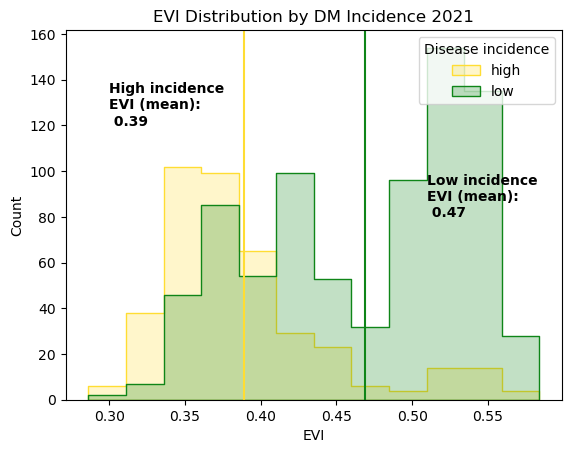

In [32]:
# Plot the 2021 EVI distribution


colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=dfs[1], x="evi", hue="inc_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease incidence', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[1][dfs[1]['inc_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.30, 120, "High incidence \nEVI (mean):\n 0.39", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[1][dfs[1]['inc_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.51, 80, "Low incidence \nEVI (mean):\n 0.47", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Incidence 2021')
#plt.savefig("evi_hist_2021.png")
plt.show()

In [33]:
# Try with just 2022
dist_low_22 = dfs[2][dfs[2]['inc_class']=='low']['evi']
len(dist_low_22)
dist_high_22 = dfs[2][dfs[2]['inc_class']=='high']['evi']
len(dist_high_22)

print(mann_whitney_u_test(dist_low_22, dist_high_22))

print("Low disease EVI (mean) 2022:", dist_low_22.mean())
print("High disease EVI (mean) 2022:", dist_high_22.mean())

Mann-Whitney U: 5405.0 p-value: 0.0005140581606930029
None
Low disease EVI (mean) 2022: 0.445100672661919
High disease EVI (mean) 2022: 0.48299929471929626


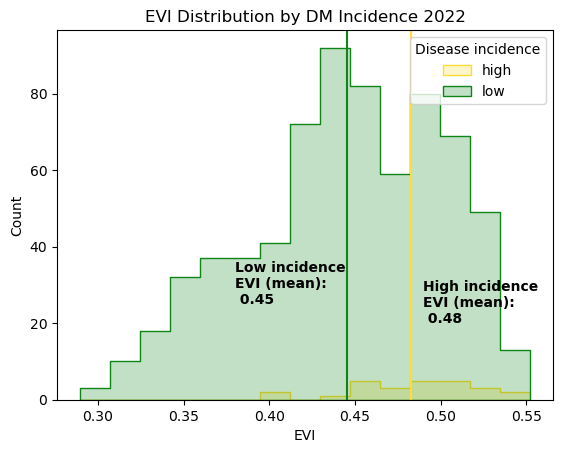

In [34]:
# Plot the 2022 EVI distribution


colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=dfs[2], x="evi", hue="inc_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease incidence', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=dfs[2][dfs[2]['inc_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.49, 20, "High incidence \nEVI (mean):\n 0.48", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=dfs[2][dfs[2]['inc_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.38, 25, "Low incidence \nEVI (mean):\n 0.45", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Incidence 2022')
#plt.savefig("evi_hist_2021.png")
plt.show()

In [35]:
# Try limiting dataset to JUST DM block

just_DM = master_df[master_df['Block']=='DM']
just_DM_20 = dfs[0][dfs[0]['Block']=='DM']
just_DM_21 = dfs[1][dfs[1]['Block']=='DM']

In [36]:
just_DM_20.Block.unique()

array(['DM'], dtype=object)

In [37]:
# Test for sig. diff in EVI for 2020

dm_low_20 = just_DM_20[just_DM_20['inc_class']=='low']['evi']
len(dm_low_20)
dm_high_20 = just_DM_20[just_DM_20['inc_class']=='high']['evi']
len(dm_high_20)

print(mann_whitney_u_test(dm_low_20, dm_high_20))
print("Low disease EVI (mean):", dm_low_20.mean())
print("High disease EVI (mean):", dm_high_20.mean())

Mann-Whitney U: 1239.5 p-value: 6.068256848620295e-07
None
Low disease EVI (mean): 0.5443280703190044
High disease EVI (mean): 0.6693284091731813


In [38]:
# For 2021

dm_low_21 = just_DM_21[just_DM_21['inc_class']=='low']['evi']
len(dm_low_21)
dm_high_21 = just_DM_21[just_DM_21['inc_class']=='high']['evi']
len(dm_high_21)

print(mann_whitney_u_test(dm_low_21, dm_high_21))
print("Low disease EVI (mean):", dm_low_21.mean())
print("High disease EVI (mean):", dm_high_21.mean())

Mann-Whitney U: 32764.0 p-value: 4.344861524484306e-31
None
Low disease EVI (mean): 0.49267541582793667
High disease EVI (mean): 0.40716483352853294


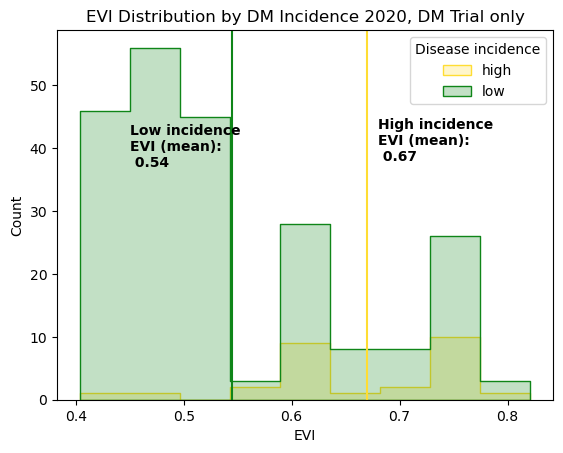

In [41]:
# DM trial only, 2020
# Plot the 2020 EVI distribution

colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=just_DM_20, x="evi", hue="inc_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease incidence', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=just_DM_20[just_DM_20['inc_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.68, 38, "High incidence \nEVI (mean):\n 0.67", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=just_DM_20[just_DM_20['inc_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.45, 37, "Low incidence \nEVI (mean):\n 0.54", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Incidence 2020, DM Trial only')
#plt.savefig("evi_hist_2020_DM.png")
plt.show()

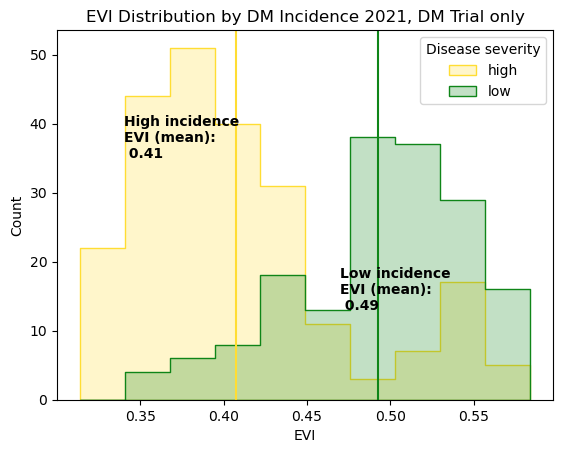

In [42]:
# DM trial only, 2021
# Plot the 2021 EVI distribution

colors = ["#0F8518", "#FFDD33"]
sns.set_palette(colors)
sns.histplot(data=just_DM_21, x="evi", hue="inc_class", element='step')

plt.xlabel('EVI')
plt.ylabel('Count')
plt.legend(title='Disease severity', loc='upper right', labels=['high', 'low'])

# Add lines for mean EVI

#high disease
plt.axvline(x=just_DM_21[just_DM_21['inc_class']=='high'].evi.mean(),
            color="#FFDD33")
plt.text(0.34, 35, "High incidence \nEVI (mean):\n 0.41", horizontalalignment='left', size='medium', color='black', weight='semibold')

#low disease
plt.axvline(x=just_DM_21[just_DM_21['inc_class']=='low'].evi.mean(),
            color="#0F8518")

plt.text(0.47, 13, "Low incidence \nEVI (mean):\n 0.49", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title('EVI Distribution by DM Incidence 2021, DM Trial only')
#plt.savefig("evi_hist_2021_DM.png")
plt.show()

In [49]:
dates_2021 = just_DM_21.Date.unique()
dates_2021

array(['2021-07-07', '2021-07-27', '2021-08-03', '2021-08-10',
       '2021-08-17'], dtype=object)

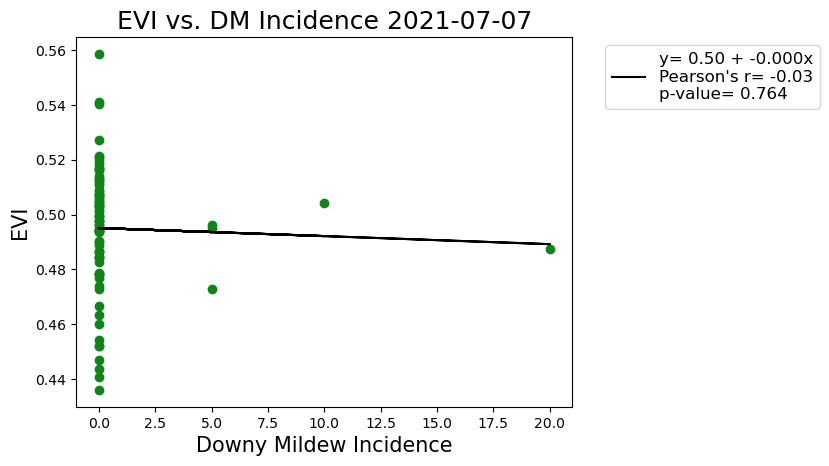

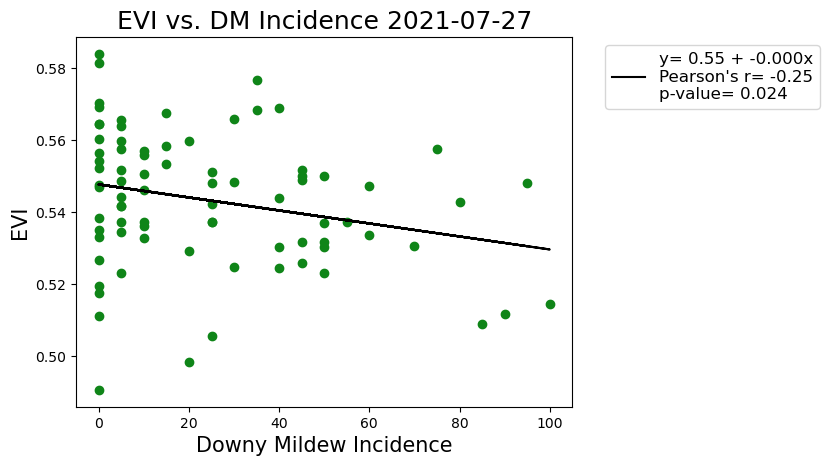

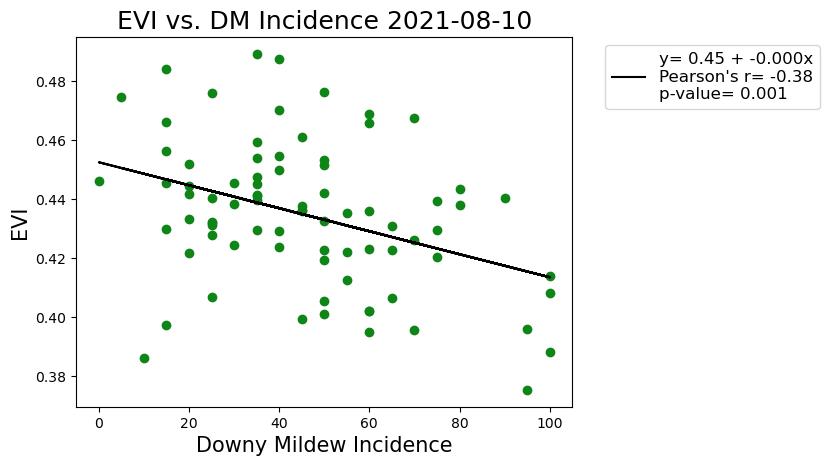

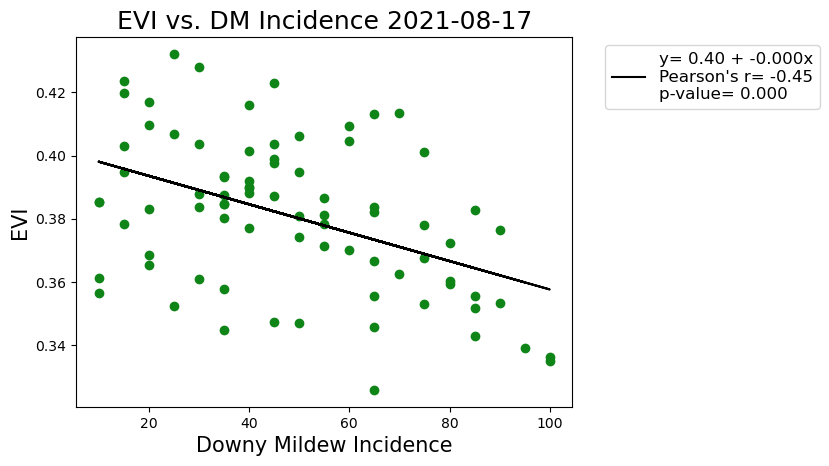

In [51]:
# Daily scatter plots 2021

dates_2021 = ['2021-07-07', '2021-07-27', '2021-08-10',
       '2021-08-17']

daily_data = []

for d in dates_2021:
    daily = just_DM_21[just_DM_21['Date']==d]
    daily_data.append(daily)
#EVI     
for df in daily_data:
    x_var = df['DM_inc'] # cubic root transform to get more normal distribution
    y_var = df['evi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
    sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
    line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
    
    fig, ax = plt.subplots()
    ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#0F8518")
    ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
    ax.set_xlabel("Downy Mildew Incidence", fontsize = 15)
    ax.set_ylabel("EVI", fontsize = 15)
    ax.set_title(f"EVI vs. DM Incidence {str(df['Date'].unique())[2:-2]}", fontsize = 18)
    ax.legend(facecolor='white')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
    plt.show()

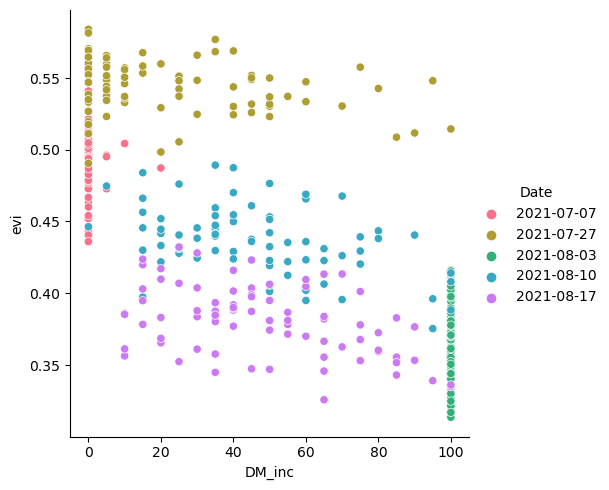

In [52]:
sns.relplot(data=just_DM_21, x="DM_inc", y="evi", hue="Date")

/var/folders/hg/02pmwyy14wvgdv7n1gzwlx1w0000gn/T/ipykernel_1269/3300276933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_DM_21['DM_inc_cbrt'] = np.cbrt(just_DM_21['DM_inc'])


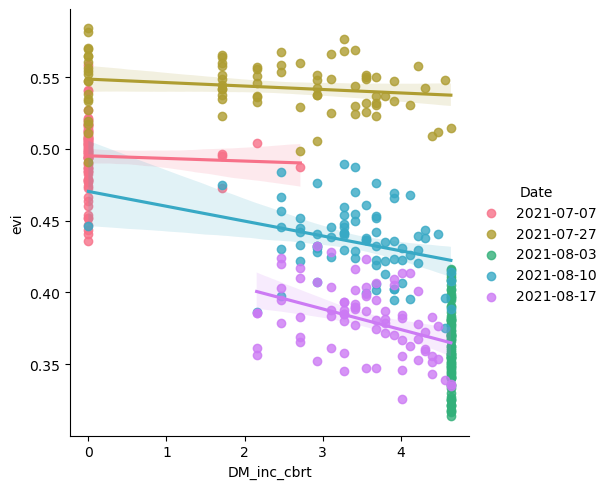

In [54]:
just_DM_21['DM_inc_cbrt'] = np.cbrt(just_DM_21['DM_inc'])
sns.lmplot(x='DM_inc_cbrt', y="evi", hue="Date", data=just_DM_21)

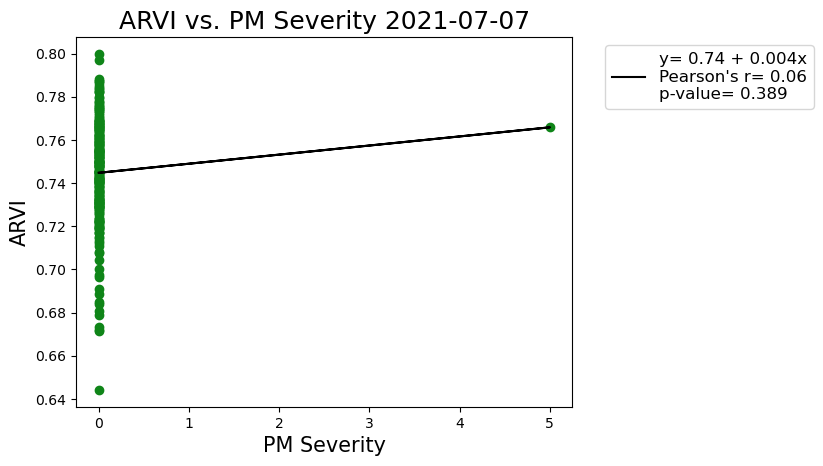

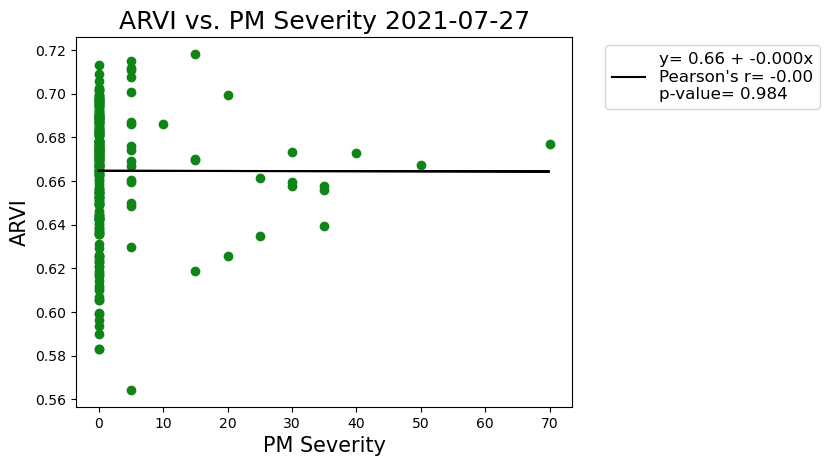

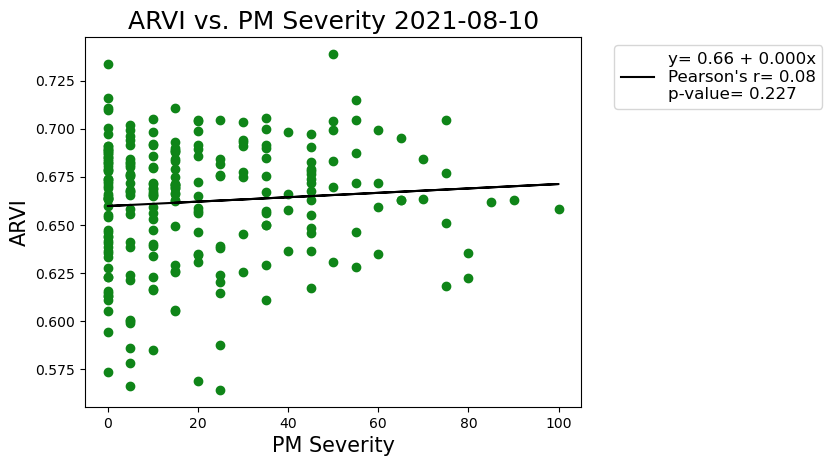

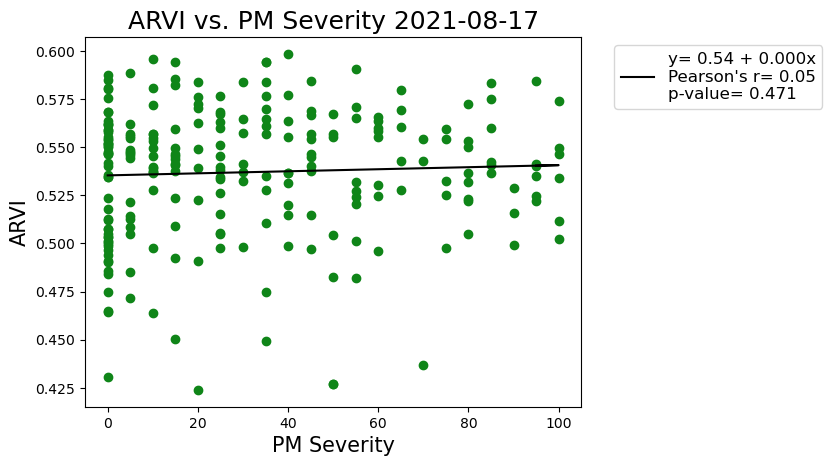

In [58]:
# Daily scatter plots 2021

daily_data = []

for d in dates_2021:
    daily = dfs[1][dfs[1]['Date']==d]
    daily_data.append(daily)
#EVI     
for df in daily_data:
    x_var = df['PM_inc'] # cubic root transform to get more normal distribution
    y_var = df['arvi'] #*100 multiply rob_sev by 100 to standardize units for hum + rob ratings
    sl, inter, rval, pval, stderror = scipy.stats.linregress(x_var, y_var)
    line = f"y= {inter:.2f} + {sl:.3f}x\nPearson's r= {rval:.2f}\np-value= {pval:.3f}"
    
    fig, ax = plt.subplots()
    ax.plot(x_var, y_var, linewidth=0, marker='o', color = "#0F8518")
    ax.plot(x_var, inter + sl * x_var, label=line, color = 'black')
    ax.set_xlabel("PM Severity", fontsize = 15)
    ax.set_ylabel("ARVI", fontsize = 15)
    ax.set_title(f"ARVI vs. PM Severity {str(df['Date'].unique())[2:-2]}", fontsize = 18)
    ax.legend(facecolor='white')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize = 12)
    plt.show()

In [59]:
def spearman_df(veg_inds, df, var_name):
    corr_coeffs = []
    p_vals = []
    vi_list = []
    
    for vi in veg_inds:
        sp_r, p = scipy.stats.spearmanr(df[var_name], df[vi])
        corr_coeffs.append(sp_r)
        p_vals.append(p)
        vi_list.append(vi)
        dictionary = {'vi':vi_list,'spearmans_r':corr_coeffs, 'p_value':p_vals}
        corr_df = pd.DataFrame(dictionary).sort_values(by='spearmans_r')
        
    return corr_df

In [62]:
veg_inds =['ndvi', 'evi', 'savi','grvi','bgvi','gri', 'gcc', 'arvi']
spearman_df(veg_inds, dfs[1], 'PM_severity')

,vi,spearmans_r,p_value
1,evi,-0.441220,4.257179e-58
7,arvi,-0.429864,6.352364e-55
2,savi,-0.428312,1.689032e-54
4,bgvi,-0.417582,1.265484e-51
3,grvi,-0.212773,1.062571e-13
5,gri,-0.212773,1.062571e-13
0,ndvi,-0.150683,1.664395e-07
6,gcc,0.251029,1.249940e-18


In [64]:
veg_inds =['ndvi', 'evi', 'savi','grvi','bgvi','gri', 'gcc', 'arvi']
spearman_df(veg_inds, dfs[1], 'PM_inc')

,vi,spearmans_r,p_value
4,bgvi,-0.750140,1.609547e-216
1,evi,-0.748075,1.082130e-214
2,savi,-0.723628,2.472455e-194
3,grvi,-0.598454,5.263864e-117
5,gri,-0.598454,5.263864e-117
7,arvi,-0.450096,1.156125e-60
0,ndvi,0.119752,3.320420e-05
6,gcc,0.273721,5.583738e-22


In [69]:
veg_inds =['ndvi', 'evi', 'savi','grvi','bgvi','gri', 'gcc', 'arvi']
spearman_df(veg_inds, dfs[2], 'PM_inc')

,vi,spearmans_r,p_value
4,bgvi,-0.333888,3.286710e-20
3,grvi,0.480395,7.626958e-43
5,gri,0.480395,7.626958e-43
6,gcc,0.648613,3.496609e-87
7,arvi,0.715061,9.569482e-114
1,evi,0.721535,9.578325e-117
2,savi,0.721586,9.068513e-117
0,ndvi,0.765918,7.155639e-140
